In [1]:
#Loading all required libraries
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings #To avoid any warnings
warnings.filterwarnings(action="ignore")
import datetime as dt # To work with Time date data set

import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.api import ExponentialSmoothing


## Data Understanding

In [2]:
df = pd.read_csv('well_cost.csv')
df.head()

,Date,Index Category,Sub Category,Region,Plow,Index,Phigh,type
0,1/1/2018,Cement,Cement Price Index,Appalachian,31.52,100.00,158.35,Normalized Price
1,2/1/2018,Cement,Cement Price Index,Appalachian,31.01,100.75,159.21,Normalized Price
2,3/1/2018,Cement,Cement Price Index,Appalachian,30.35,100.87,161.99,Normalized Price
3,4/1/2018,Cement,Cement Price Index,Appalachian,29.61,100.57,160.39,Normalized Price
4,5/1/2018,Cement,Cement Price Index,Appalachian,28.80,102.17,160.23,Normalized Price


In [3]:
#Checking data size
df.shape

(4524, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4524 entries, 0 to 4523
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4524 non-null   object 
 1   Index Category  4524 non-null   object 
 2   Sub Category    4524 non-null   object 
 3   Region          4524 non-null   object 
 4    Plow           4524 non-null   float64
 5    Index          4524 non-null   float64
 6    Phigh          4524 non-null   float64
 7   type            4524 non-null   object 
dtypes: float64(3), object(5)
memory usage: 282.9+ KB


In [5]:
df.describe()

,Plow,Index,Phigh
count,4524.000000,4524.000000,4524.000000
mean,78.355802,103.623691,140.714052
std,23.198859,33.392147,58.592580
min,19.510000,38.790000,40.850000
25%,65.332500,90.932500,111.257500
50%,80.585000,100.730000,127.565000
75%,92.610000,112.372500,157.832500
max,201.440000,522.150000,768.100000


In [6]:
# checking for null values
df.isnull().mean()

Date              0.0
Index Category    0.0
Sub Category      0.0
Region            0.0
 Plow             0.0
 Index            0.0
 Phigh            0.0
type              0.0
dtype: float64

In [7]:
df.columns

Index(['Date', 'Index Category', 'Sub Category', 'Region', ' Plow ', ' Index ',
       ' Phigh ', 'type'],
      dtype='object')

In [8]:
# Here Few column names have spaces at start and end, so removing them
df = df.rename(columns={" Plow ": "Plow", " Index ": "Index"," Phigh ":"Phigh"})

In [9]:
df.columns

Index(['Date', 'Index Category', 'Sub Category', 'Region', 'Plow', 'Index',
       'Phigh', 'type'],
      dtype='object')

In [10]:
# Extracting year and month from Date column
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

In [11]:
df.head()

,Date,Index Category,Sub Category,Region,Plow,Index,Phigh,type,year,month
0,1/1/2018,Cement,Cement Price Index,Appalachian,31.52,100.00,158.35,Normalized Price,2018,1
1,2/1/2018,Cement,Cement Price Index,Appalachian,31.01,100.75,159.21,Normalized Price,2018,2
2,3/1/2018,Cement,Cement Price Index,Appalachian,30.35,100.87,161.99,Normalized Price,2018,3
3,4/1/2018,Cement,Cement Price Index,Appalachian,29.61,100.57,160.39,Normalized Price,2018,4
4,5/1/2018,Cement,Cement Price Index,Appalachian,28.80,102.17,160.23,Normalized Price,2018,5


## Data Analysis and Visualization

### Average cost Index breakdown for U.S. regions oil well cost components

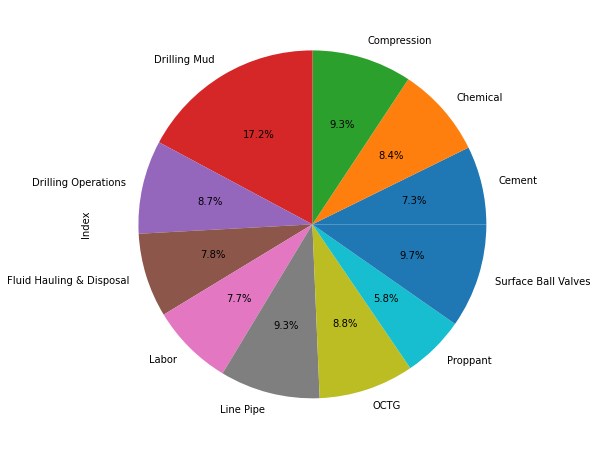

In [12]:
plt.figure(figsize=[10,8])
df.groupby(['Index Category'])['Index'].mean().plot.pie(autopct='%1.1f%%')
plt.xticks(rotation = 90)
plt.show()

#### Drilling Mud also called drilling fluid, in petroleum engineering, a heavy, viscous fluid mixture that is used in oil and gas drilling operations to carry rock cuttings to the surface. This category has high contribution of 17.2% towards cost indedx followed by Surface Ball valves, Compression, Line pipe etc

### Historical Cost Index Variation for Different Regions

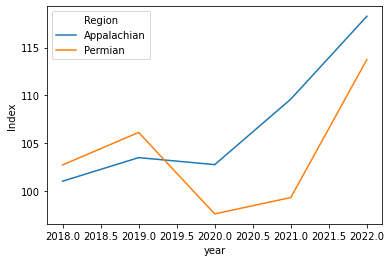

In [13]:
sns.lineplot(x=df['year'], y= df['Index'], hue = df['Region'], ci = None)
plt.show()

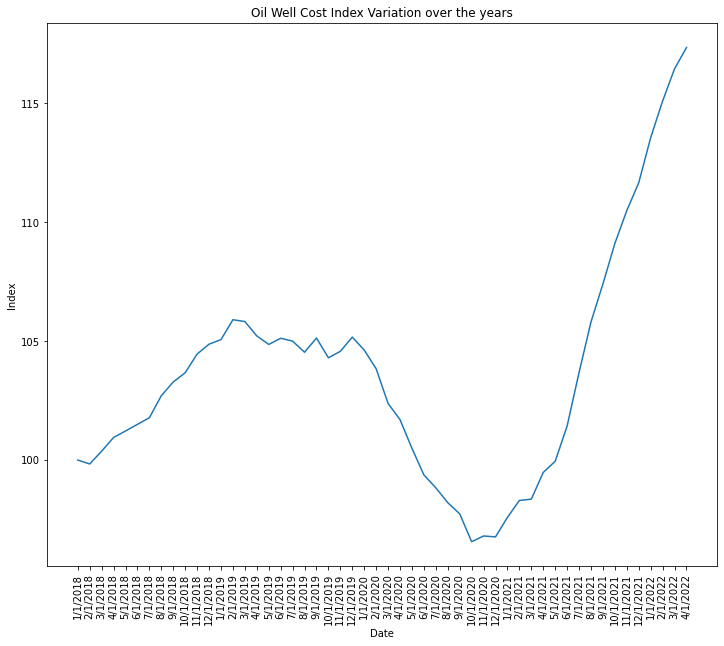

In [14]:
plt.figure(figsize = (12,10))
plt.xticks(rotation = 90)
sns.lineplot(x=df['Date'], y= df['Index'], ci = None)
plt.title('Oil Well Cost Index Variation over the years')

plt.show()

#### Index dropped from 2019 to 2020, as Oil and gas sector was heavily affected by Covid. Cost Index for Appalachian region is higher than Permian

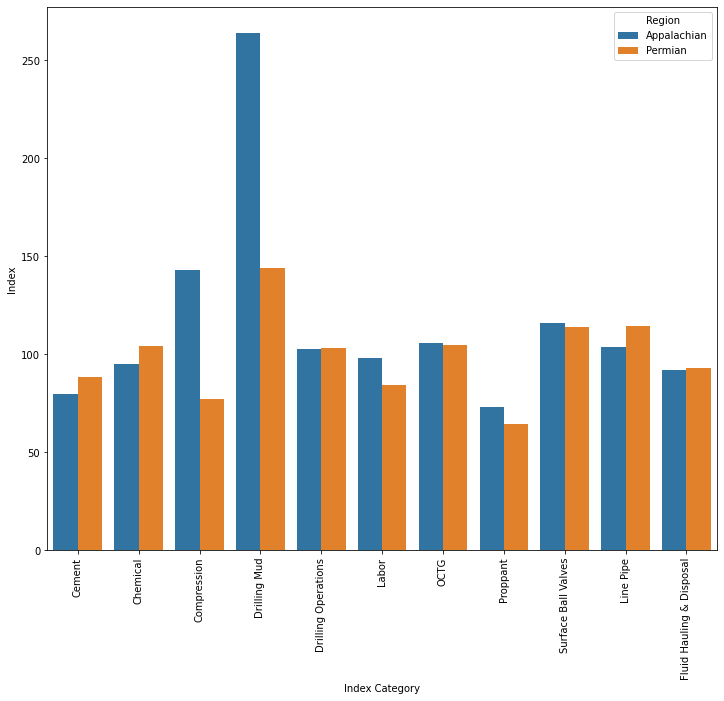

In [15]:
# Plotting Index of different Index categories with respect to regions
plt.figure(figsize=[12,10])
sns.barplot(data=df, x="Index Category", y="Index", hue = 'Region', ci = None)
plt.xticks(rotation = 90)
plt.show()

#### Drilling mud in Appalachian region has high mean Cost Index, However Proppant in Permian region has lowest oil cost index

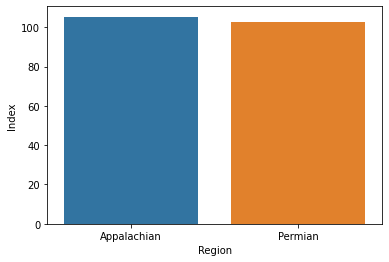

In [16]:
sns.barplot(data = df,x='Region', y='Index', ci = None)
plt.show()

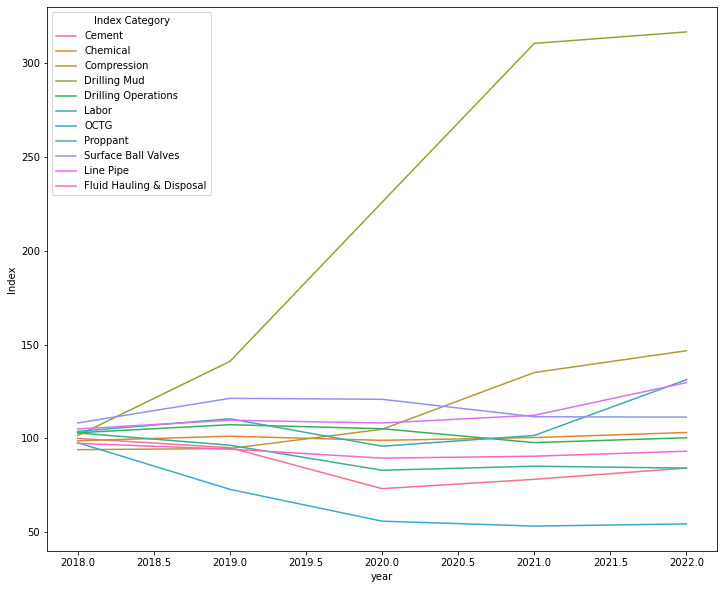

In [17]:
# Analyzing cost Index for different Categories yearwise
plt.figure(figsize=[12,10])
sns.lineplot(x=df['year'], y= df['Index'], hue = df['Index Category'], ci = None)
plt.show()

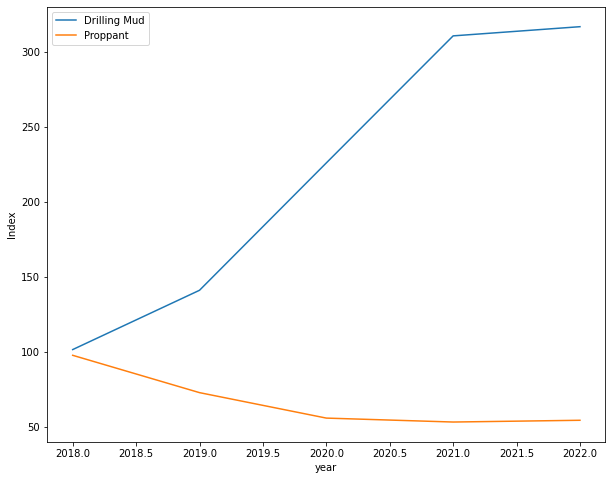

In [18]:
plt.figure(figsize = [10,8])
sns.lineplot(data = df[df['Index Category']=='Drilling Mud'], x = 'year',y= 'Index', ci = None)
sns.lineplot(data = df[df['Index Category']=='Proppant'], x = 'year',y= 'Index', ci = None)
plt.legend(labels=["Drilling Mud","Proppant"])
plt.show()

#### Contribution of Drilling Mud towards Cost Index is increasing year by year due to increased in demand for energy and increase in drilling processes for oil exploration. However for Proppant market trend is decresing due to shifting towards more localized sources of fracturing sand, operators can reduce the cost of operation, ultimately improving the economics around the lower margins of the recovering prices. 



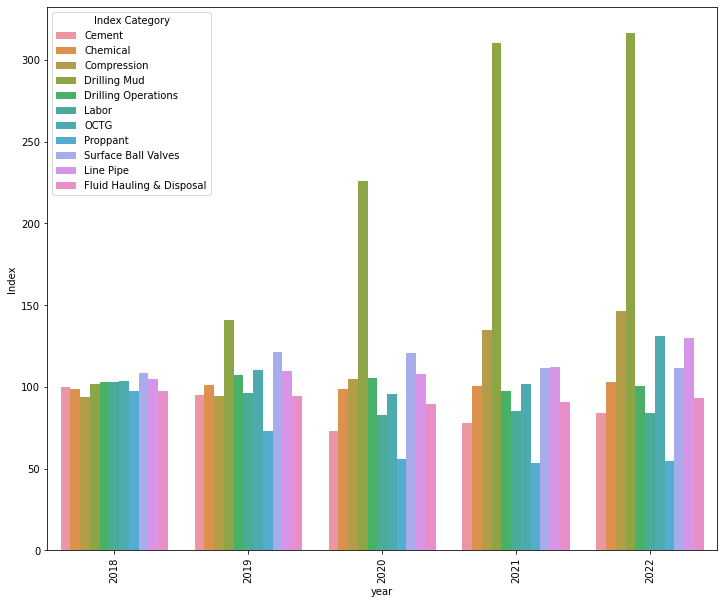

In [19]:
# Analyzing Index categories yearwise
plt.figure(figsize=[12,10])
sns.barplot(data=df, x="year", y="Index", hue = 'Index Category', estimator = np.mean, ci = None)
plt.xticks(rotation = 90)
plt.show()

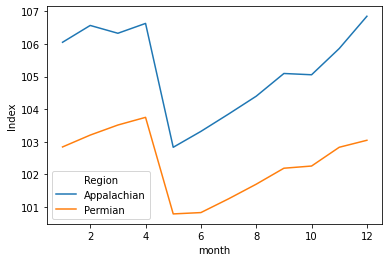

In [20]:
# Analyzing Cost Index on monthly basis
sns.lineplot(x=df['month'], y= df['Index'], hue = df['Region'], ci = None)
plt.show()

#### It is observed that, mean Index is falling for months April and May every year.

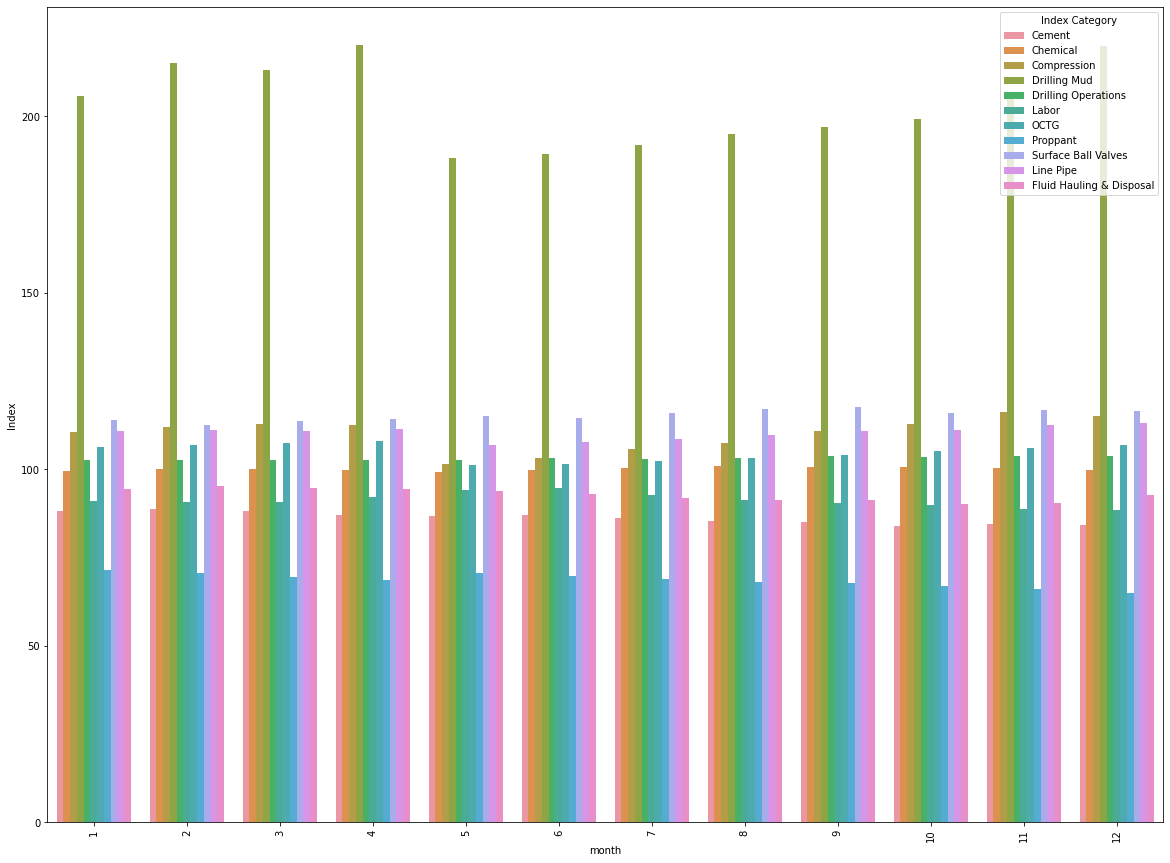

In [21]:
plt.figure(figsize=[20,15])
sns.barplot(data=df, x="month", y="Index", hue = 'Index Category', ci=None)
plt.xticks(rotation = 90)
plt.show()

In [22]:
cont_cols = ['Plow','Index','Phigh']

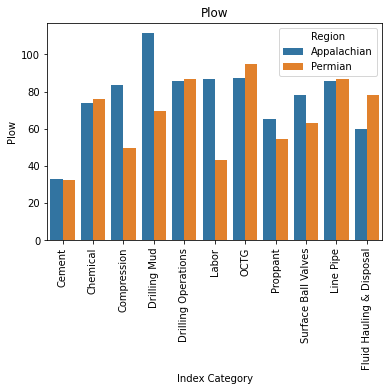

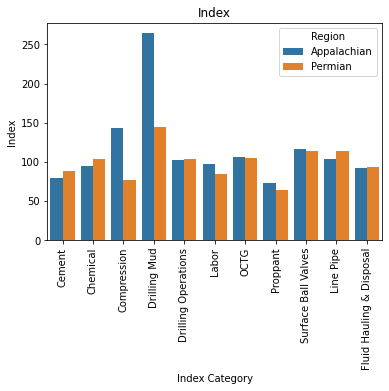

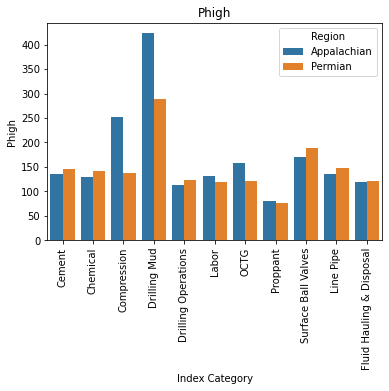

In [23]:
for i in cont_cols:
    plt.title(i)
    sns.barplot(data=df, x='Index Category', y=i, hue = 'Region', ci = None)
    plt.xticks(rotation = 90)
    plt.show()

### Forecasting by Simple Moving Average for 'Drilling Mud' Index Category 

In [24]:
df1 = df[(df['Index Category']=='Drilling Mud') & (df['Region']=='Appalachian')]
df2 = df[(df['Index Category']=='Drilling Mud') & (df['Region']=='Permian')]


In [25]:
df1['Moving Avg_12'] = df1['Index'].rolling(window=4).mean().shift(1)

df2['Moving Avg_12'] = df2['Index'].rolling(window=4).mean().shift(1)


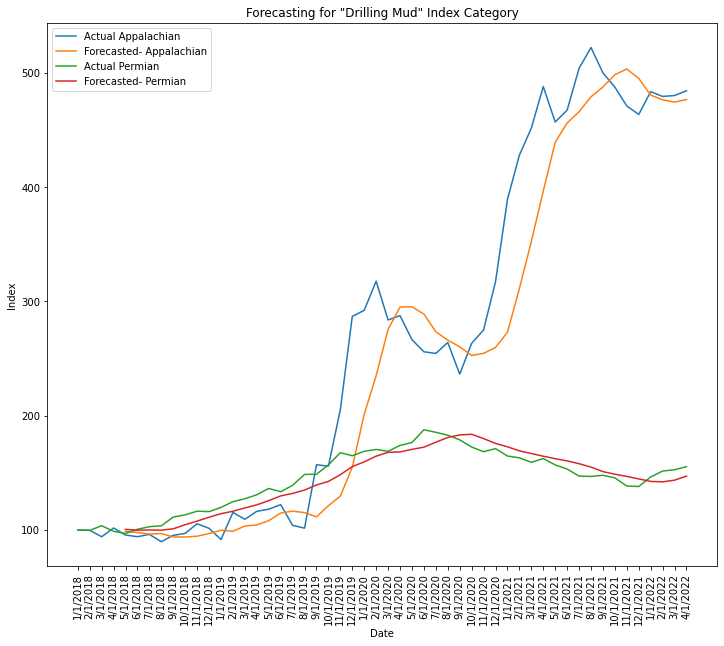

In [26]:
plt.figure(figsize=[12,10])
sns.lineplot(data = df1, x = 'Date', y ='Index')
sns.lineplot(data = df1, x = 'Date', y ='Moving Avg_12')

sns.lineplot(data = df2, x = 'Date', y ='Index')
sns.lineplot(data = df2, x = 'Date', y ='Moving Avg_12')
plt.xticks(rotation = 90)
plt.title('Forecasting for "Drilling Mud" Index Category')
plt.legend(labels=["Actual Appalachian","Forecasted- Appalachian","Actual Permian","Forecasted- Permian"])
plt.show()


In [27]:
# Mean Absolute percentage error
# Function for MAPE
def get_mape(actual, predicted):
    return np.round(np.mean(np.abs((actual-predicted) / actual))*100,2)
print(get_mape(df1['Index'][30:].values, df1['Moving Avg_12'][30:].values))
print(get_mape(df2['Index'][30:].values, df2['Moving Avg_12'][30:].values))

8.65
4.33


In [28]:
# Square root of the average of the squared errors.
# Calculate RMSE 
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(df1['Index'][30:].values, df1['Moving Avg_12'][30:].values)))
print(np.sqrt(mean_squared_error(df2['Index'][30:].values, df2['Moving Avg_12'][30:].values)))


50.57693490996032
7.368751166242487


### Forecasting by Exponetial Smoothing Method

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fit1 = ExponentialSmoothing(np.asarray(df1['Index'].values)[:30], seasonal_periods=12 ,trend='add', seasonal='add',).fit()
fit1.summary()

Dep. Variable:,endog,No. Observations:,30
Model:,ExponentialSmoothing,SSE,7401.990
Optimized:,True,AIC,197.249
Trend:,Additive,BIC,219.668
Seasonal:,Additive,AICC,259.431
Seasonal Periods:,12,Date:,"Wed, 27 Jul 2022"
Box-Cox:,False,Time:,20:11:14
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.000000,beta,True


In [30]:
train_data = df1['Index'][:30]
test_data = df1['Index'][30:]
y_hat_avg = test_data.copy()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_data))
rms = math.sqrt(mean_squared_error(test_data, y_hat_avg.Holt_Winter))
print(rms)

96.77255341885234


In [31]:
get_mape(test_data, y_hat_avg.Holt_Winter)

17.67

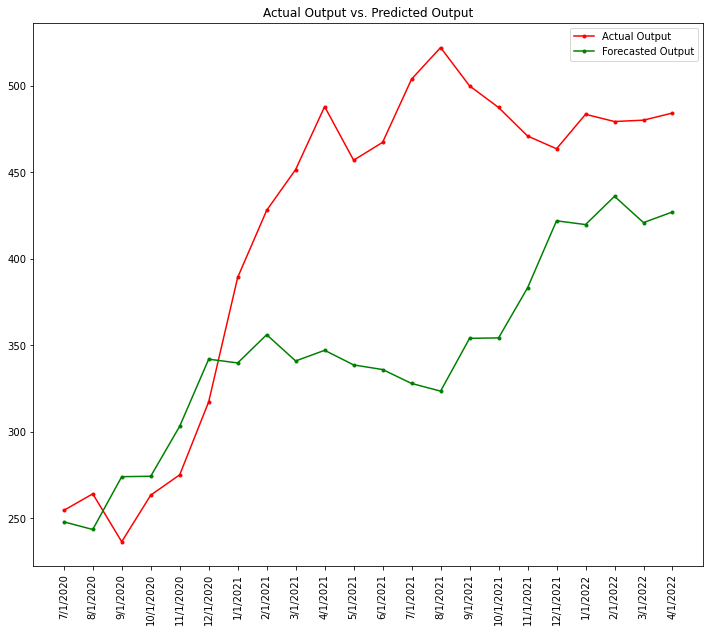

In [32]:
fig = plt.figure(figsize=(12,10));
future, = plt.plot(df1['Date'][30:], test_data, 'r.-', label='Actual Output');
predicted_future, = plt.plot(df1['Date'][30:], y_hat_avg.Holt_Winter, 'g.-', label='Forecasted Output');
plt.xticks(rotation = 90)
plt.legend(handles=[future, predicted_future]);
plt.title('Actual Output vs. Predicted Output');

### Forecasting by Simple Moving Average for 'Proppant' Index Category 

In [33]:
df3 = df[(df['Index Category']=='Proppant') & (df['Region']=='Appalachian')]
df4 = df[(df['Index Category']=='Proppant') & (df['Region']=='Permian')]


In [34]:
df3['Moving Avg_12'] = df3['Index'].rolling(window=4).mean().shift(1)
df4['Moving Avg_12'] = df4['Index'].rolling(window=4).mean().shift(1)



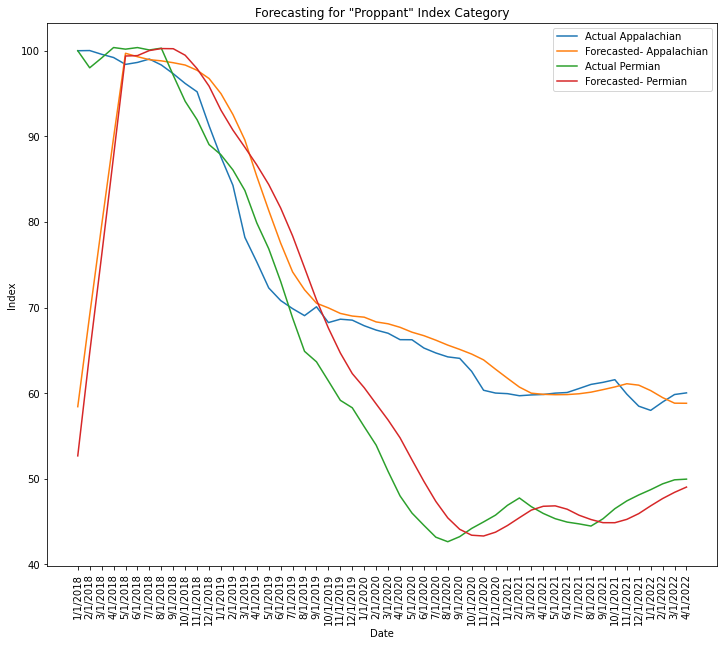

In [35]:
plt.figure(figsize=[12,10])
sns.lineplot(data = df3, x = 'Date', y ='Index', ci = None)
sns.lineplot(data = df3, x = 'Date', y ='Moving Avg_12',  ci = None)

sns.lineplot(data = df4, x = 'Date', y ='Index',  ci = None)
sns.lineplot(data = df4, x = 'Date', y ='Moving Avg_12', ci = None)
plt.xticks(rotation = 90)
plt.title('Forecasting for "Proppant" Index Category')
plt.legend(labels=["Actual Appalachian","Forecasted- Appalachian","Actual Permian","Forecasted- Permian"])
plt.show()

In [36]:
# Mean Absolute percentage error
# Function for MAPE
def get_mape(actual, predicted):
    return np.round(np.mean(np.abs((actual-predicted) / actual))*100,2)
print(get_mape(df3['Index'][30:].values, df3['Moving Avg_12'][30:].values))
print(get_mape(df4['Index'][30:].values, df4['Moving Avg_12'][30:].values))

4.5
7.22


In [37]:
# Square root of the average of the squared errors.
# Calculate RMSE 
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(df3['Index'][30:].values, df3['Moving Avg_12'][30:].values)))
print(np.sqrt(mean_squared_error(df4['Index'][30:].values, df4['Moving Avg_12'][30:].values)))


7.857664498376577
9.19509898733585
